# **1. Perkenalan Dataset**
 Dataset dapat diperoleh dari sumber, *Kaggle* pada link [ini](https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer)


# **2. Import Library**

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

In [3]:
df = pd.read_csv('pulmonarycancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,PULMONARY_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  PULMONARY_CANCER       

Kolom GENDER dan PULMONARY_CANCER harus di-*encoding*

In [5]:
def clean_column_names(df):
    """
    Cleans DataFrame column names by:
    - Replacing spaces and hyphens with underscores,
    - Converting to lowercase,
    - Removing non-alphanumeric characters (excluding underscores).

    Args:
        df: pandas DataFrame.

    Returns:
        pandas DataFrame with cleaned column names.
    """
    cleaned_columns = []
    for col in df.columns:
        cleaned_col = col.strip()
        cleaned_col = re.sub(r'[\s\-]+', '_', cleaned_col)
        cleaned_col = re.sub(r'[^\w]', '', cleaned_col)
        cleaned_col = cleaned_col.lower()
        cleaned_columns.append(cleaned_col)
    df.columns = cleaned_columns
    return df

df = clean_column_names(df)
print(df.columns)


Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'pulmonary_cancer'],
      dtype='object')


# **4. Exploratory Data Analysis (EDA)**

In [6]:
df.shape

(309, 16)

Data tersebut memiliki 309 baris dan 16 kolom

In [7]:
df.describe(include = 'all')

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,pulmonary_cancer
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


In [8]:
# memeriksa missing value
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

Tidak terdapat missing value pada data tersebut

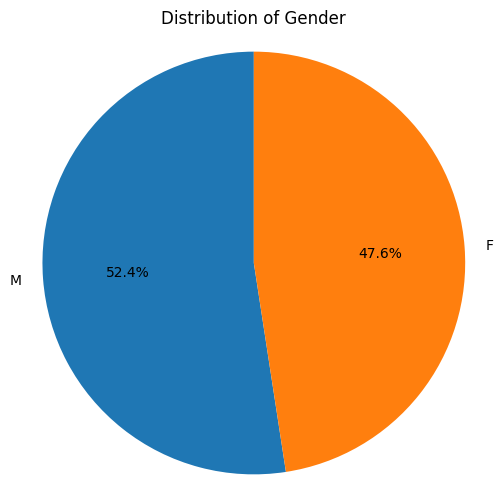

In [9]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


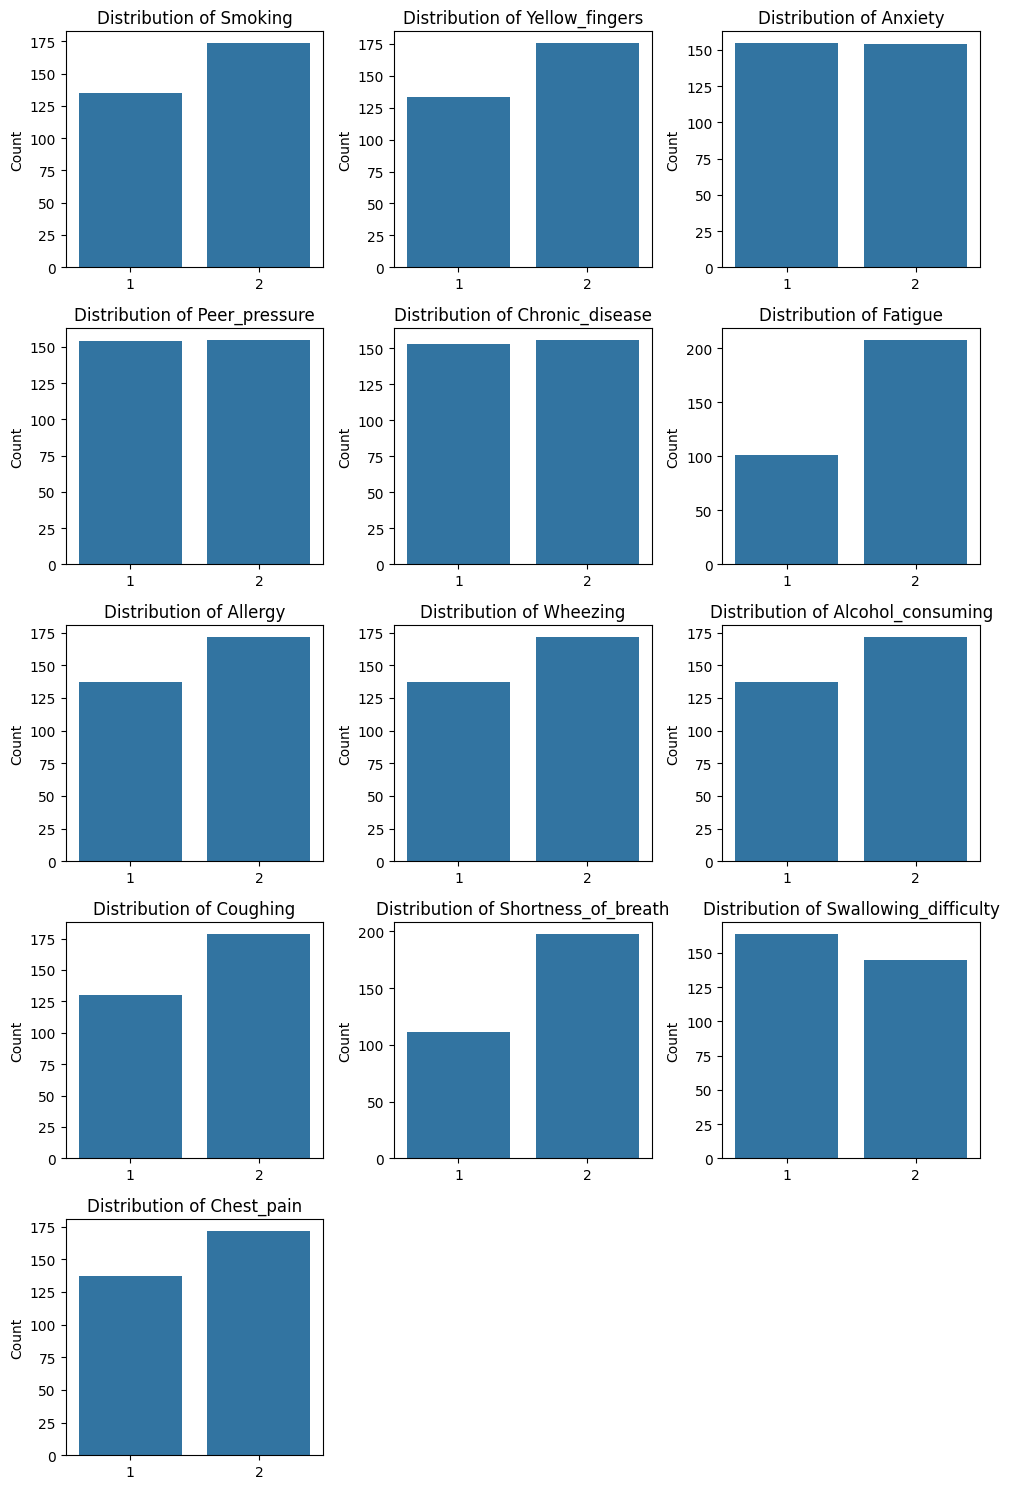

In [10]:
columns = ['smoking', 'yellow_fingers', 'anxiety', 'peer_pressure',
           'chronic_disease', 'fatigue', 'allergy', 'wheezing',
           'alcohol_consuming', 'coughing', 'shortness_of_breath',
           'swallowing_difficulty', 'chest_pain']


plt.figure(figsize=(10, 15))
for i, col in enumerate(columns):
    plt.subplot(5, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

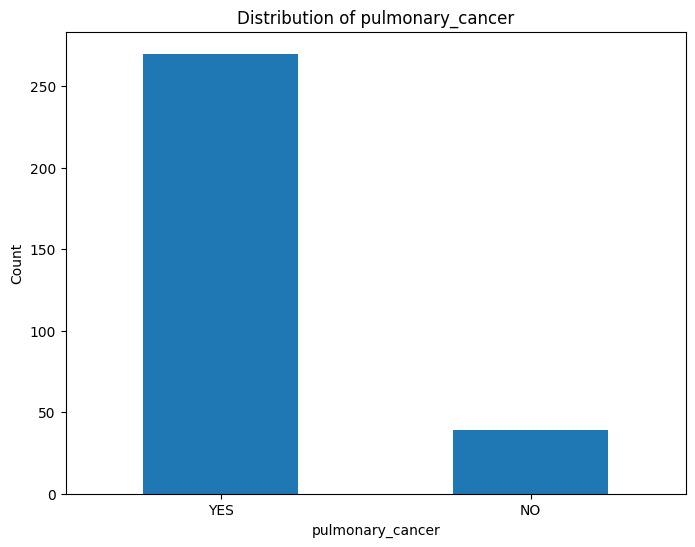

In [ ]:
# Membuat histogram untuk kolom pulmonary_cancer
plt.figure(figsize=(8, 6))
df['pulmonary_cancer'].value_counts().plot(kind='bar')
plt.title('Distribution of pulmonary_cancer')
plt.xlabel('pulmonary_cancer')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

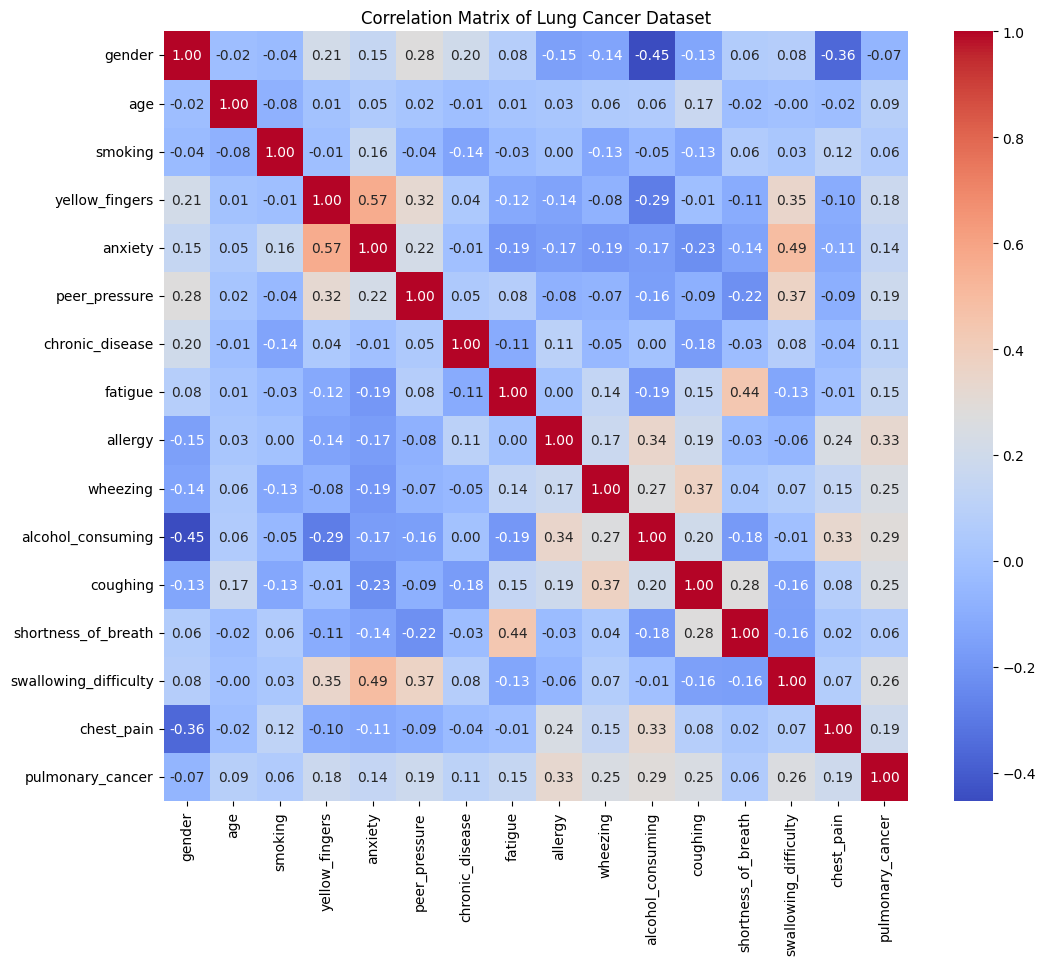

In [ ]:
# Mengkodekan kolom 'gender' dan 'pulmonary_cancer' menjadi numerik
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
df['pulmonary_cancer'] = df['pulmonary_cancer'].map({'YES': 1, 'NO': 0})

# Membuat matriks korelasi
correlation_matrix = df.corr()

# Menampilkan matriks korelasi menggunakan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Lung Cancer Dataset')
plt.show()

# **5. Data Preprocessing**

In [ ]:
duplicates = df.duplicated()
print(f"\nTotal jumlah baris duplikat: {duplicates.sum()}")


Total jumlah baris duplikat: 33


In [14]:
df_cleaned = df.drop_duplicates()

duplicates_after_drop = df_cleaned.duplicated()
print(f"\nJumlah baris duplikat setelah penghapusan: {duplicates_after_drop.sum()}")


Jumlah baris duplikat setelah penghapusan: 0


In [15]:
binary_columns = ['smoking', 'yellow_fingers', 'anxiety', 'peer_pressure',
                  'chronic_disease', 'fatigue', 'allergy', 'wheezing',
                  'alcohol_consuming', 'coughing', 'shortness_of_breath',
                  'swallowing_difficulty', 'chest_pain']


df[binary_columns] = df[binary_columns].replace({1: 0, 2: 1})

In [16]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,pulmonary_cancer
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [ ]:
df.to_csv('pulmonarycancerclean.csv', index=False)